In [240]:
import numpy as np, matplotlib.pyplot as plt, scipy, scienceplots
from random import randint
plt.style.use('science')

# Assignment 4
### Section 7.1
Page 199

#### (a)

First we make a functiion wich generates a list of positions for a random walk.

In [241]:
def rand_walk(start=(0,0), steps=1000):
    data = []
    x, y = start[0],start[1]
    dx, dy = 1, 1
    for setp in range(steps):
        data.append([x,y])
        if randint(0,1) == 1: x += dx
        else: x -= dx
        if randint(0,1) == 1: y += dy
        else: y -= dy
    return np.array(data).T

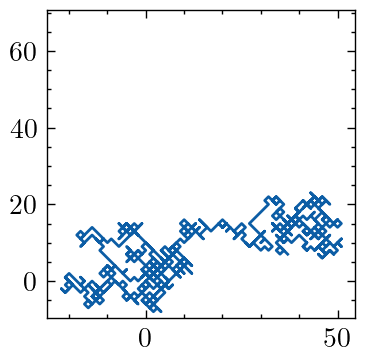

In [242]:
x,y = rand_walk()
fig, ax = plt.subplots(1,1,figsize=(2,2),dpi=200)
ax.plot(x,y)
ax.axis('square')
plt.show()

#### (b)

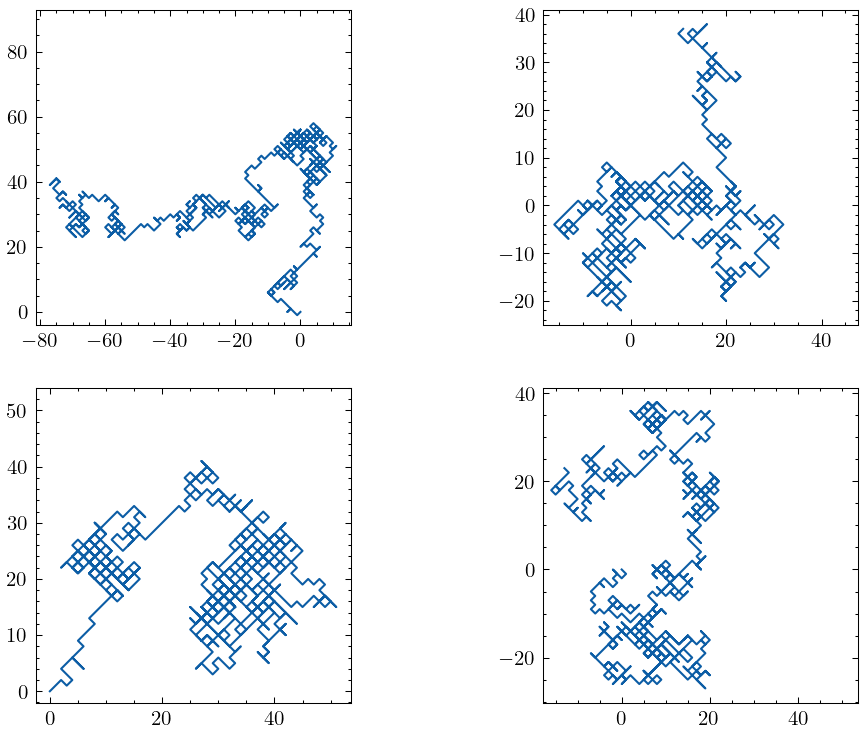

In [243]:
fig, ax = plt.subplots(2,2,figsize=(8,6),dpi=150)
axes_x, axes_y = [0,0,1,1,], [0,1,0,1]
for i0, (i1, i2) in enumerate(zip(axes_x,axes_y)):
    x,y = rand_walk()
    ax[i1,i2].plot(x,y,label="plot{i0}")
    ax[i1,i2].axis('square')
plt.show()

### 7.2
####  (a)

The question asks us to make one plot then also asks to plot the end points. With one plot there should be only one end point. This does not make any sense. 

In [244]:
def displacement(x,y):
    return np.sqrt(x**2+y**2)

In [245]:
def endpoint_distribution(N=1000, steps=1000):
    endpoints, endpoint_distances = [], []
    for i in range(N):
        x, y = rand_walk(steps=steps)
        dif = displacement(x[-1], y[-1])
        endpoints.append([x[-1], y[-1]])
        endpoint_distances.append(dif)
    endpoints = np.array(endpoints).T
    return endpoints, endpoint_distances

In [246]:
endpoints, endpoint_distances = endpoint_distribution(N=1000, steps=1000)

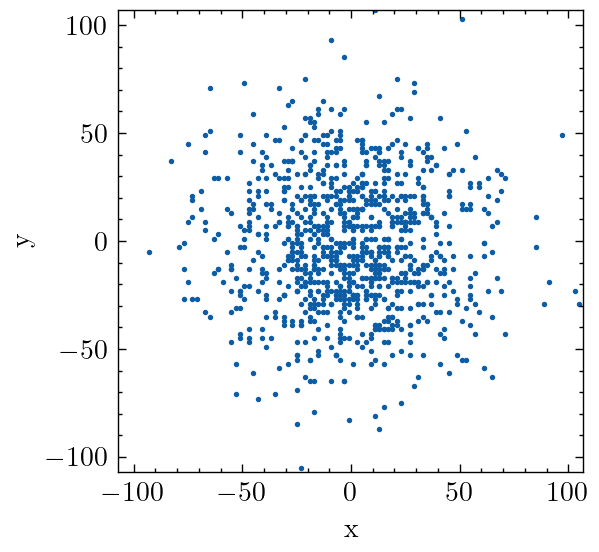

In [264]:
fig, ax = plt.subplots(1,1,figsize=(3,3),dpi=200)
ax.scatter(endpoints[0], endpoints[1], s=0.9)
ax.set_xlabel("x")
ax.set_ylabel("y")
max_endpoint = max(endpoints.flatten()) # get the max value form the flattened list of endpoints
ax.set_xlim(-max_endpoint,max_endpoint) # use the max value to set the limits of the x and y axis
ax.set_ylim(-max_endpoint,max_endpoint)
_=plt.plot()

#### (b)

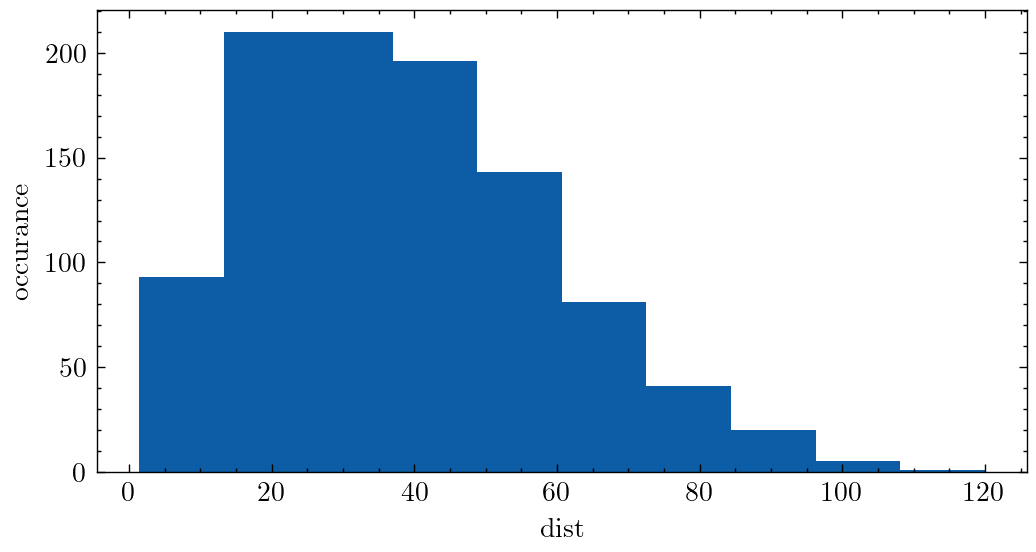

In [248]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=200)
ax.hist(endpoint_distances)
ax.set_xlabel("dist")
ax.set_ylabel("occurance")
_=plt.plot()

#### (c)

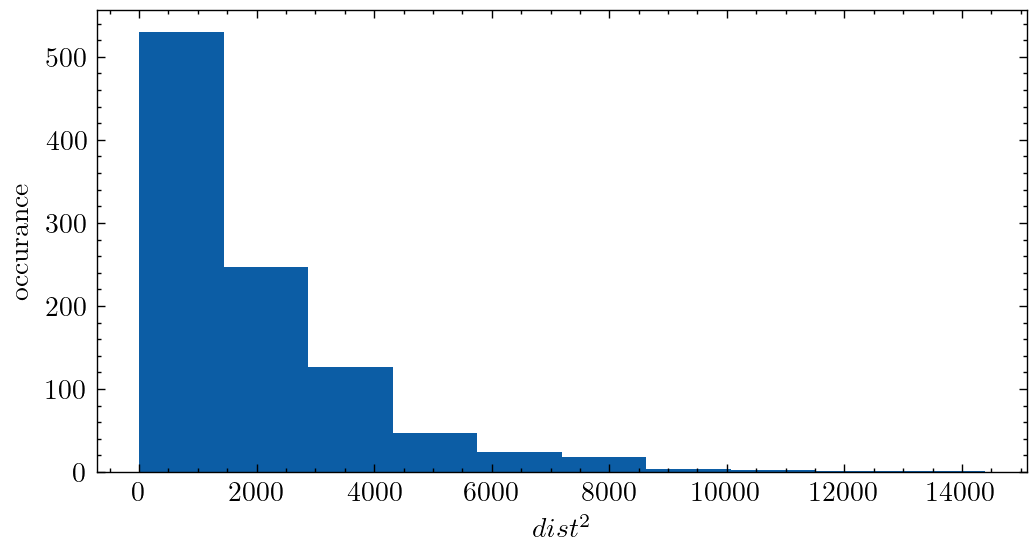

In [249]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=200)
ax.hist(np.array(endpoint_distances)**2)
ax.set_xlabel("$dist^2$")
ax.set_ylabel("occurance")
_=plt.plot()

#### (d)

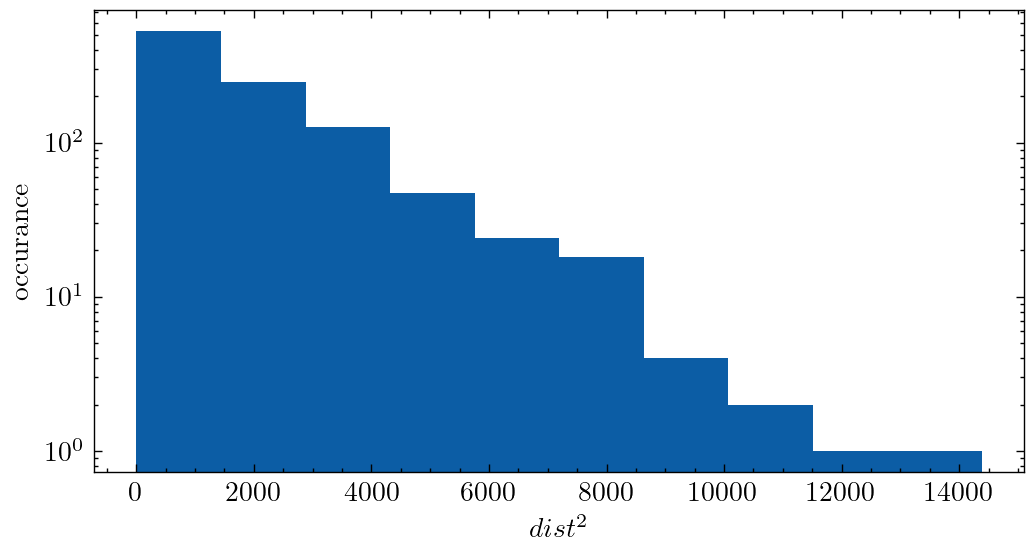

In [250]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=200)
ax.hist(np.array(endpoint_distances)**2)
ax.set_xlabel("$dist^2$")
ax.set_ylabel("occurance")
ax.set_yscale('log')
_=plt.plot()

There seems to be a linear relationship between $dist^2$ and $\ln(\text{occurence})$, or more conveniently, $\exp(dist^2) = occurence$.

#### (e)

In [251]:
np.mean(np.array(endpoint_distances)**2)

1874.368

#### (f)

In [252]:
endpoints, endpoint_distances = endpoint_distribution(N=1000, steps=1000)

In [253]:
np.mean(np.array(endpoint_distances)**2)

1862.808

### 7.3.1

#### (a)

$$
P(l) = \frac{e^{-\lambda}\cdot\lambda^l}{l!}
$$
$l$ is the number of occurrences
$\lambda$ is the expected value and also it's variance 

In [254]:
poisson = lambda l, lamb: np.exp(-lamb)*(lamb**l)/scipy.special.factorial(l)

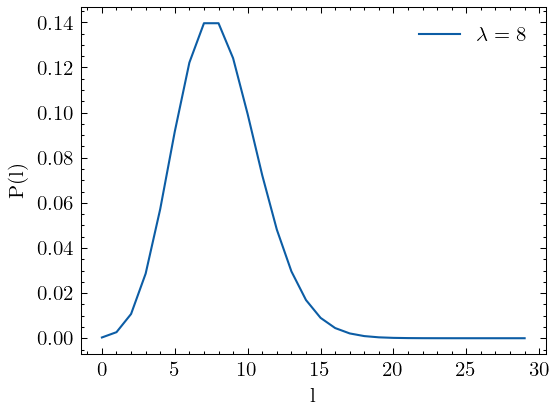

In [255]:
x = np.arange(30,dtype=float)
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.plot(x, poisson(l=x,lamb=8),label="$\lambda = 8$")
ax.set_xlabel("l")
ax.set_ylabel("P(l)")
ax.legend()
_=plt.show()

#### (b)

In [256]:
def flip(chance_of_heads=8): # 1 represents heads and 0 represents tails 
    if randint(1,100) <= chance_of_heads: return 1
    else: return 0

In [257]:
def flip_trial(num_flips=100):  
    return [flip() for i in range(num_flips)] # returns of list of heads and tails 

In [258]:
def master_flip_trial(N=1000):
    return [sum(flip_trial()) for i in range(N)]

#### (c)

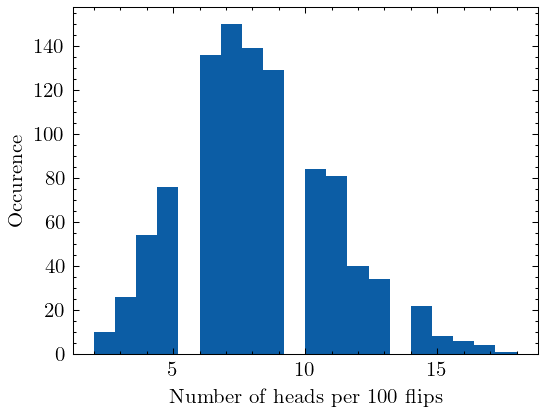

In [259]:
N = 1000
fig,ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(master_flip_trial(N=N),bins=20)
ax.set_xlabel(r"Number of heads per 100 flips")
ax.set_ylabel("Occurence")
_ = plt.show()

#### (d)

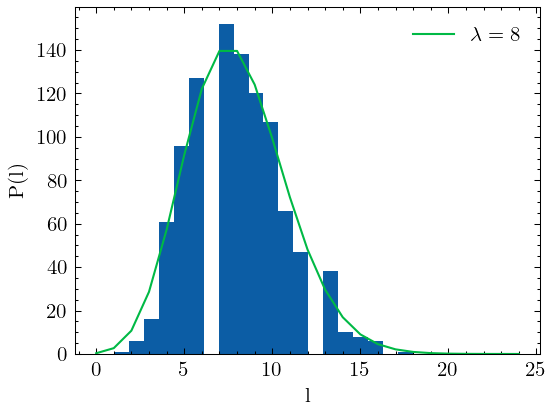

In [260]:
x = np.arange(25,dtype=float)
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(master_flip_trial(N=N),bins=20)
ax.plot(x, poisson(l=x,lamb=8)*N,label=f"$\lambda = 8$")
ax.set_xlabel("l")
ax.set_ylabel("P(l)")
ax.legend()
_=plt.show()

#### (e)

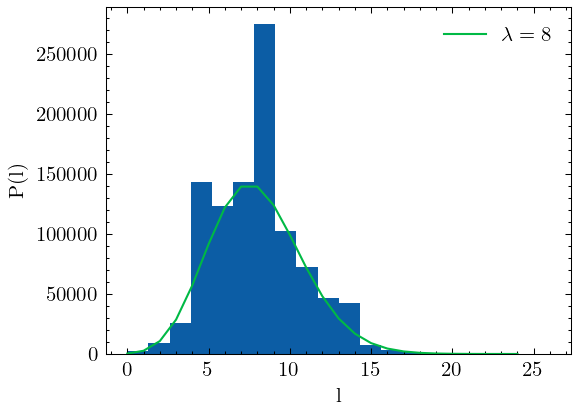

In [261]:
N = 1_000_000
x = np.arange(25,dtype=float)
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(master_flip_trial(N=N),bins=20)
ax.plot(x, poisson(l=x,lamb=8)*N,label=f"$\lambda = 8$")
ax.set_xlabel("l")
ax.set_ylabel("P(l)")
ax.legend()
_=plt.show()

### 7.3.2

#### (a)

In [268]:
def freq(arr):
    counter = 0 
    data = []
    for i in arr:
        if i == 0: counter += 1
        else: 
            data.append(counter)
            counter = 0 
    return data

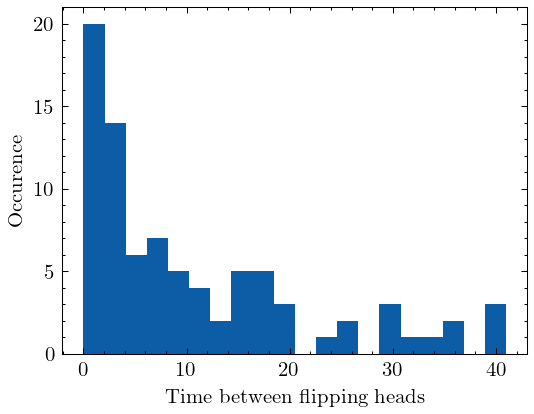

In [274]:
N = 1000
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(freq(flip_trial(num_flips=N)),bins=20)
ax.set_xlabel("Time between flipping heads")
ax.set_ylabel("Occurence")
_=plt.show()

#### (b)

In [275]:
print(f"The average waiting time is {round(np.mean(freq(flip_trial(num_flips=10_000))),2)} flips.")

The average waiting time is 11.66 flips.


#### (c)

In [ ]:
N = 1_000_000
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(freq(flip_trial(num_flips=N)),bins=20,label=f"")
ax.set_xlabel("Time between flipping heads")
ax.set_ylabel("Occurence")
ax.legend()
_=plt.show()